In [32]:
# importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r"D:\Data\Heart_Disease_Prediction.csv" , encoding = 'utf-8')

In [34]:
print('shape of framework : {}' .format(df.shape))
df.head(10)

shape of framework : (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## there are 0 missing values in this data and heart disease column is the only object column

In [36]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [38]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [39]:
# convert heart disease to numeric
df["target"] = df["Heart Disease"].apply(lambda x: 1 if x == 'Presence' else 0)

In [41]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\HP\AppData\Local\Temp\ipykernel_13020\4134588451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,target
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [40]:
df.groupby(['Chest pain type', 'target'])['target'].count().unstack()


target,0,1
Chest pain type,,
1,15,5
2,35,7
3,62,17
4,38,91


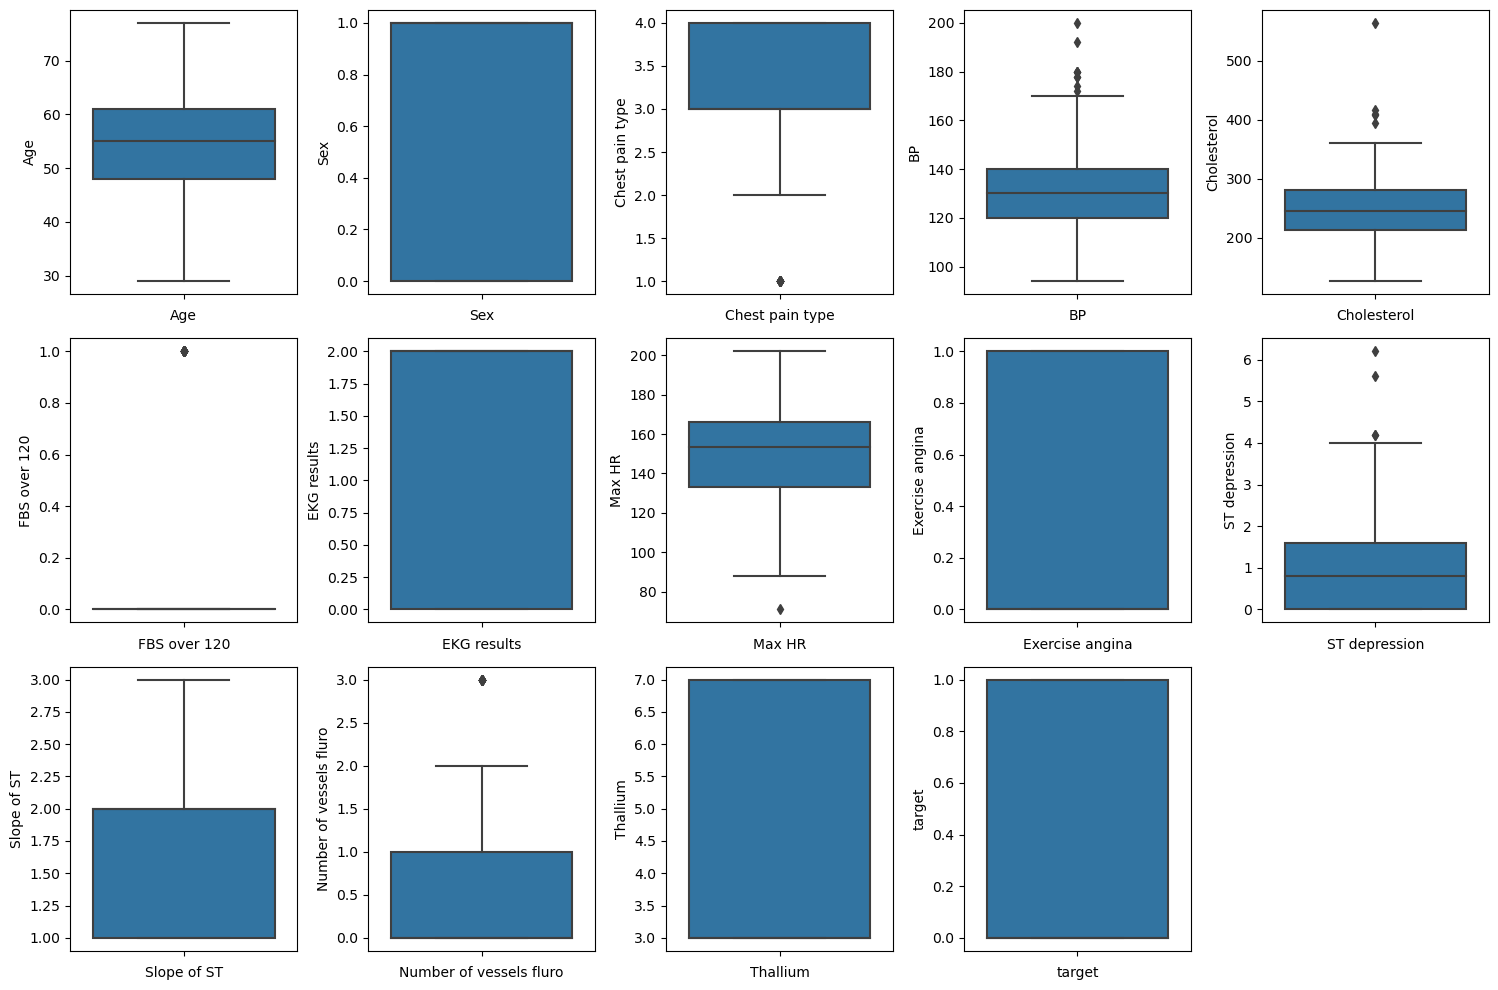

In [43]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Plotting boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=numeric_columns[column])
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()


In [46]:
df.loc[df['Cholesterol'] > 350 , :].sort_values(by='Cholesterol', ascending = False)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,target
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
52,65,0,3,140,417,1,2,157,0,0.8,1,1,3,Absence,0
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,Presence,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence,1
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3,Absence,0
123,65,0,3,160,360,0,2,151,0,0.8,1,0,3,Absence,0
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3,Absence,0
257,55,1,4,132,353,0,0,132,1,1.2,2,1,7,Presence,1


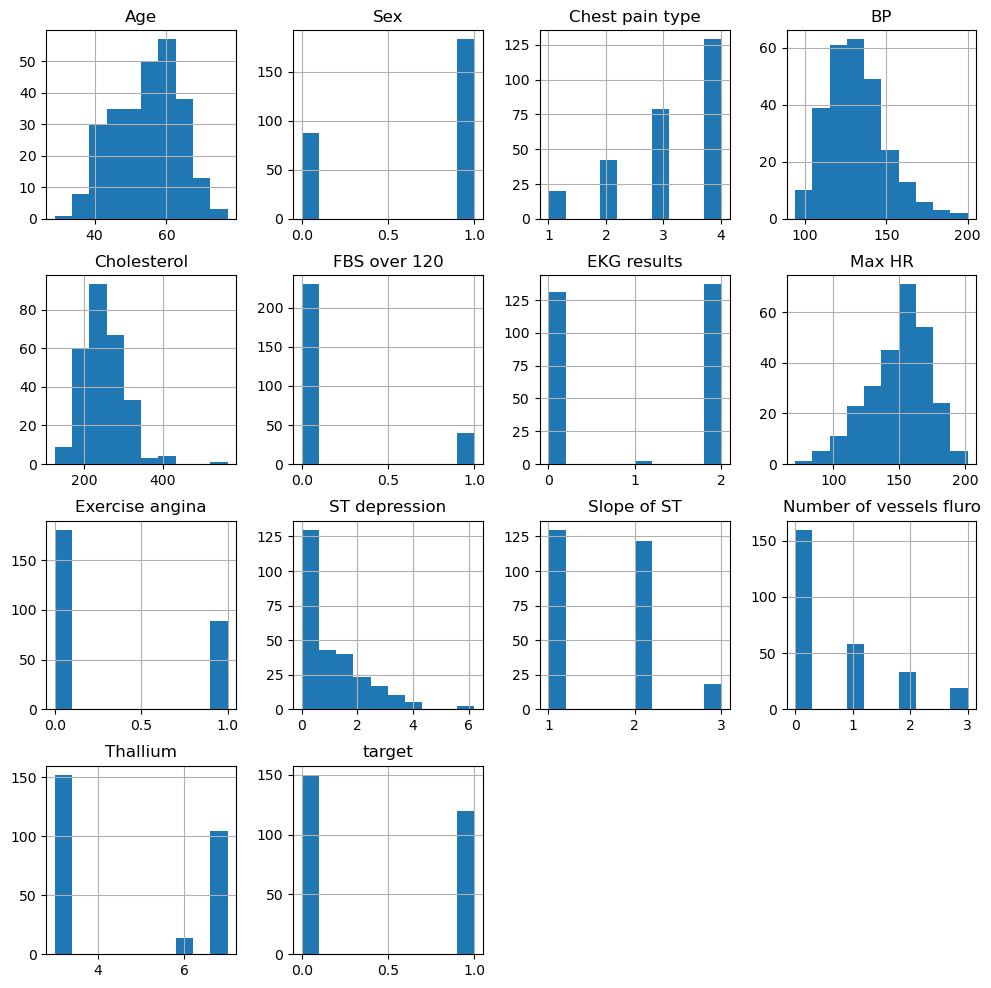

In [47]:
df.hist(figsize = (12, 12));

<Figure size 1200x600 with 0 Axes>

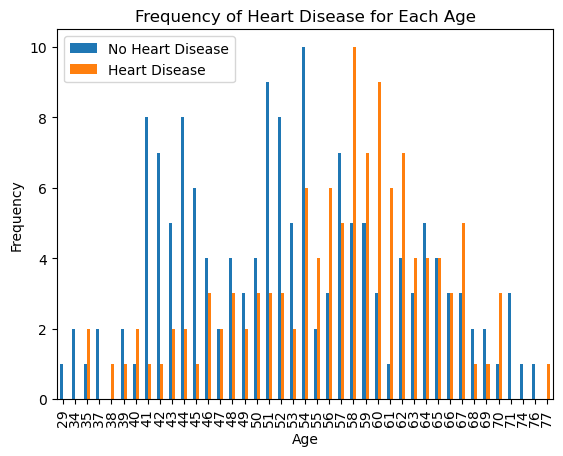

In [49]:

# Group by age and target to get the frequency
age_frequency = df.groupby(["Age", "Heart Disease"]).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
age_frequency.plot(kind="bar", stacked=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Heart Disease for Each Age")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show();

## see if there is people at age of 70+ and don't have heart disease 

In [50]:
# Filter by aged 70 and above
age_70plus = df[df["Age"] >= 70]

# Calculate the proportion of individuals without heart disease in this age group
no_heart_disease = age_70plus[age_70plus["target"] == 0].shape[0] / age_70plus.shape[0]
no_heart_disease

0.6

In [51]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
target                       int64
dtype: object

In [52]:
df.drop(columns = 'Heart Disease' , inplace =True)

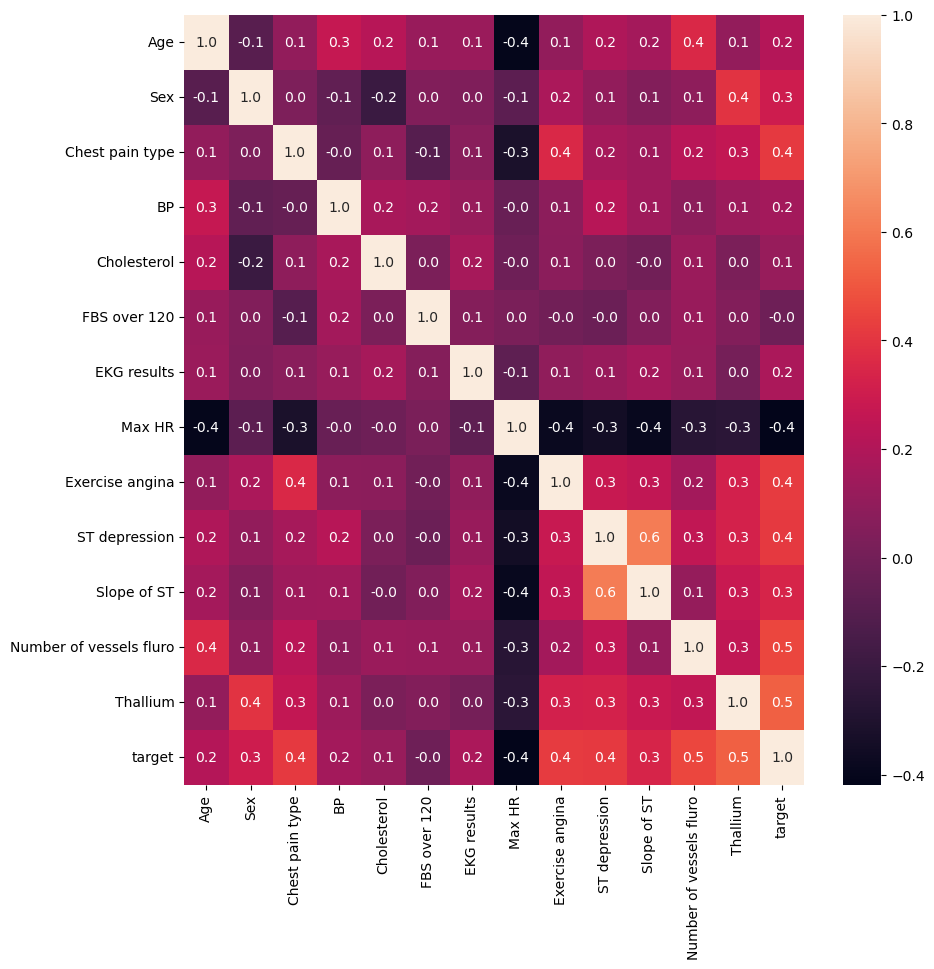

In [53]:
numeric = df.select_dtypes(include='number')
plt.figure(figsize=(10,10))
sns.heatmap(numeric.corr(),annot=True,fmt='.1f')
plt.show()

In [56]:
corelation = df.corr()[['target']]
corelation.style.background_gradient(cmap='coolwarm')

,target
Age,0.212322
Sex,0.297721
Chest pain type,0.417436
BP,0.155383
Cholesterol,0.118021
FBS over 120,-0.016319
EKG results,0.182091
Max HR,-0.418514
Exercise angina,0.419303
ST depression,0.417967


In [57]:
df.groupby('target').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
target,,,,,,,,,,,,,
0,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
1,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


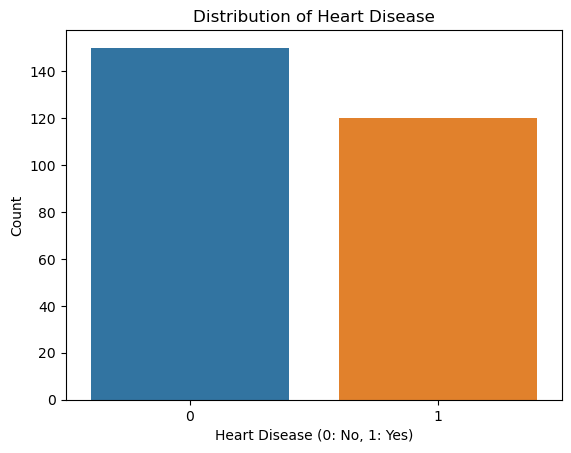

In [58]:
# Explore the distribution of the target variable 'target'
sns.countplot(x='target', data=df)
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

## looks like approximately equal (balanced dataset).

## building the model


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score


In [60]:
# Select all columns except the target as features
features = df.columns.drop('target')
X = df[features]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Accuracy: 0.8518518518518519
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


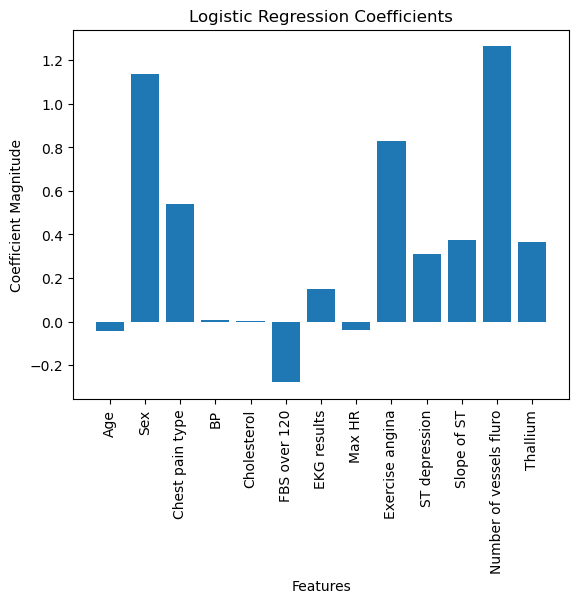

In [61]:

# Extract the coefficients and corresponding feature names
coef = model.coef_[0]
features = df.drop('target', axis=1).columns

# Plot the coefficients
plt.bar(features, coef)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

## Using Other Classification Algorithms

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Calculate F1 score for Random Forest model
rf_f1 = f1_score(y_test, rf_y_pred)

print('Random Forest F1 Score:', rf_f1)


Random Forest F1 Score: 0.816326530612245


In [63]:
from sklearn.svm import SVC

# Define the hyperparameters and their values to test
param_grid_svc = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_svc.fit(X_train, y_train)

# Print the best parameters and corresponding f1 score
print("Best Parameters for SVC:", grid_search_svc.best_params_)
print("Best F1 Score for SVC:", grid_search_svc.best_score_)


Best Parameters for SVC: {'C': 100, 'kernel': 'poly'}
Best F1 Score for SVC: 0.7414548151390256


In [64]:
pip install xgboost


In [65]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to test
param_grid_xgb = {
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and corresponding f1 score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

# Train XGBoost with the best parameters
best_xgb = xgb.XGBClassifier(**grid_search_xgb.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

# Predictions
xgb_y_pred = best_xgb.predict(X_test)

# Calculate F1 score for XGBoost model
xgb_f1 = f1_score(y_test, xgb_y_pred)

print('XGBoost F1 Score:', xgb_f1)


Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score for XGBoost: 0.7993292482766167
XGBoost F1 Score: 0.816326530612245


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.7962962962962963
F1 Score: 0.7843137254901961
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.74      0.83      0.78        24

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



In [68]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.8333333333333334
F1 Score: 0.830188679245283
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.76      0.92      0.83        24

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



## it seems Logistic Regression is the best model in this case